# Model M/M/1/$\infty$<br>

In [ ]:
import random
import csv
import copy
import matplotlib.pyplot as plt

<img src="http://drive.google.com/uc?export=view&id=1Xo5eE9EAz_Adxs9mMh982Cod2J-iiOQ0" width="800">

<img src="http://drive.google.com/uc?export=view&id=1D9oSXOref5jTtY7_eJqZWbWEaybNG6mP" width="700">

$\Omega = \{\omega = \{\omega_1, \omega_2, \dots, \omega_n, \dots\}: \omega_i \in \{0, 1\}\}$<br>
$\quad \quad \omega_i = 1$ - at the time $t_i$ request arrives<br>
$\quad \quad \omega_i = 0$ - at the time $t_i$ request goes away
<br>
<br>
$F = 2^{\Omega}$
<br>
<br>
$P(\{\omega_i = 1\}) = \frac{\lambda}{\lambda + \mu}$<br>
<br>
$P(\{\omega_i = 0\}) = \frac{\mu}{\lambda + \mu}$
<br>
<br>
$X_i(\omega) = max\{\sum\limits_{j = 1}^i \omega_j - \sum\limits_{j = 1}^i (1 - \omega_j), 0 \}$
<br>
<br>
$P(X_{i + 1}(\omega) = n + 1/X_{i + 1}(\omega) = n) = \frac{\lambda}{\lambda + \mu}$
<br>
<br>
$P(X_{i + 1}(\omega) = n - 1/X_{i + 1}(\omega) = n) = \frac{\mu}{\lambda + \mu}$
<br>
<br>
Transition rate matrix:<br><br>
$\mathbb{P} = \begin{pmatrix}
	\frac{\mu}{\lambda + \mu} & \frac{\lambda}{\lambda + \mu} & 0 & 0 & 0 & \dots\\
	\frac{\mu}{\lambda + \mu} & 0 & \frac{\lambda}{\lambda + \mu} & 0 & 0 & \dots\\
	0 & \frac{\mu}{\lambda + \mu} & 0 & \frac{\lambda}{\lambda + \mu} & 0 & \dots\\
	0 & 0 & \frac{\mu}{\lambda + \mu} & 0 & \frac{\lambda}{\lambda + \mu} & \dots\\
	\dots
	\end{pmatrix}$

In [ ]:
LAMBDAS = [0.03, 0.05, 0.08]
PROCESSING_TIMES = [5, 10]
TOTAL_SIMULATION_TIMES = [1000, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000, 250000, 500000,
                          750000, 1000000, 2500000, 5000000, 7500000, 10000000]

## Model definition

In [ ]:
class Job:
    def __init__(self, arrival_time, job_id, job_size):
        self.job_id = job_id
        self.arrival_time = arrival_time
        self.service_time = random.expovariate(1 / job_size)
        self.service_start_time = 0
        self.service_end_time = 0
        self.job_delay_time = 0 # total time spent in system (service time + queue time)
        self.queue_time = 0 # time spent in queue
        self.status = 0  # 0 for created, 1 for queued, 2 for processing, 3 for completed

    def add_and_process_job_queue(self, this_system):
        self.service_time = self.service_time
        self.service_start_time = max(self.arrival_time, this_system.latest_job_service_ending_time)
        self.service_end_time = self.service_start_time + self.service_time
        self.queue_time = self.service_start_time - self.arrival_time
        self.job_delay_time = self.queue_time + self.service_time

In [ ]:
class System:
    def __init__(self, service_rate, simulation_time):
        self.service_rate = service_rate
        self.latest_job_service_ending_time = 0  # initially no job
        self.queue_list = []
        self.queue_summary_over_time = {}
        self.simulation_time = simulation_time

    def handle_jobs(self, the_new_job):
        current_time = the_new_job.arrival_time
        self.latest_job_service_ending_time = the_new_job.service_end_time

        new_job_inserted = False
        finished_jobs = []
        temp_copy_of_jobs_in_sys = copy.copy(self.queue_list)

        for this_job in temp_copy_of_jobs_in_sys:
            if this_job.service_start_time <= current_time and this_job.status < 2:
                fileSystem.write(f'Time: {this_job.service_start_time}sec \t Job Id:{this_job.job_id} Started processing...\n')
                self.queue_summary_over_time[current_time] = len(self.queue_list)
                this_job.status = 2
                if this_job.service_end_time <= current_time:
                    this_job.status = 3
                    fileSystem.write(f'Time: {this_job.service_end_time}sec \t Job Id:{this_job.job_id} Finished processing,' +
                                   f'queue size is: {len(self.queue_list) - 1}\n')
                    self.queue_list.remove(this_job)
                    self.queue_summary_over_time[this_job.service_end_time] = len(self.queue_list)
                    finished_jobs.append(this_job)
            elif this_job.service_end_time <= current_time and this_job.status == 2:
                this_job.status = 3
                fileSystem.write(f'Time: {this_job.service_end_time}sec \t Job Id:{this_job.job_id} Finished processing' +
                               f'queue size is: {len(self.queue_list) - 1}\n')
                self.queue_list.remove(this_job)
                self.queue_summary_over_time[this_job.service_end_time] = len(self.queue_list)
                finished_jobs.append(this_job)
        if not new_job_inserted:
            self.queue_list.append(the_new_job)
            self.queue_summary_over_time[current_time] = len(self.queue_list)
            fileSystem.write(f'Time: {current_time}sec \t Job Id:{the_new_job.job_id}' +
                           f' Entered system, queue size is: {len(self.queue_list)}\n')
            the_new_job.status = 1

#   If the time allotted for modeling the process is up  
    def finalize_jobs(self):
        temp_copy_of_jobs_in_sys_at_end_time = copy.copy(self.queue_list)
        current_time = self.simulation_time

        for this_job in temp_copy_of_jobs_in_sys_at_end_time:
            if this_job.status == 2:
                this_job.status = 3
                fileSystem.write(f'Time: {this_job.service_end_time}sec \t Job Id:{this_job.job_id}' + 
                         f'Finished processing, queue size is: {len(self.queue_list) - 1}\n')
                self.queue_list.remove(this_job)
                self.queue_summary_over_time[this_job.service_end_time] = len(self.queue_list)
                if this_job.service_end_time > current_time:
                    current_time = this_job.service_end_time
            elif this_job.status < 2:
                fileSystem.write(f'Time: {this_job.service_start_time}sec \t Job Id: {this_job.job_id} Started processing...\n')
                self.queue_summary_over_time[this_job.service_end_time] = len(self.queue_list)
                this_job.status = 2

                this_job.status = 3
                fileSystem.write(f'Time: {this_job.service_end_time}sec \t Job Id:{this_job.job_id}' +
                            f'Finished processing , queue size is: {len(self.queue_list) - 1}\n')
                self.queue_list.remove(this_job)
                self.queue_summary_over_time[this_job.service_end_time] = len(self.queue_list)
                if this_job.service_end_time > current_time:
                    current_time = this_job.service_end_time
        print(f'Time: {current_time}sec End of last job in the System')

In [ ]:
class Simulator:
    def __init__(self, arrival_rate, service_rate, simulation_time):
        self.arrival_rate = arrival_rate
        self.system = System(service_rate, simulation_time)

    def run(self, simulation_time):
        print('\nTime: 0 sec, Simulation starts for λ={}  μ={:.2f}'.format(self.arrival_rate, 1/self.system.service_rate))
        current_time = random.expovariate(self.arrival_rate)
        this_jobs = {}
        job_id = 1

        while current_time <= simulation_time:
            new_job = Job(current_time, job_id, self.system.service_rate)
            this_jobs[job_id] = new_job
            new_job.add_and_process_job_queue(self.system)

            self.system.handle_jobs(new_job)
            current_time += random.expovariate(self.arrival_rate)
            job_id += 1
        self.system.finalize_jobs()
        print(f'Total jobs:{len(this_jobs)}')
        return this_jobs

In [ ]:
def save_results():
    for job in the_jobs:
        fileSave.write(f'{the_jobs[job].job_id} {the_jobs[job].arrival_time} {the_jobs[job].service_start_time}' +
                       f'{the_jobs[job].service_end_time} {the_jobs[job].job_delay_time} {the_jobs[job].service_time}'+
                      f'{the_jobs[job].queue_time}\n')

In [ ]:
fileSystem = open('./system.txt', 'w')
fileSave = open('./results.txt', 'w')
simulators = []
jobs = []
for time in TOTAL_SIMULATION_TIMES:
    for this_lambda in LAMBDAS:
        for process_time in PROCESSING_TIMES:
            fileSystem.write('_____________________LAMBDA_{}_MU_{:.2f}________________________\n'.format(this_lambda, 
                                                                                                         1/process_time))
            fileSave.write('_____________________LAMBDA_{}_MU_{:.2f}________________________\n'.format(this_lambda, 
                                                                                                       1/process_time))
            simulator = Simulator(this_lambda, process_time, time)     
            the_jobs = simulator.run(time)  
            jobs.append(the_jobs)
            save_results()
            simulators.append(simulator)
fileSystem.close()
fileSave.close()


Time: 0 sec, Simulation starts for λ=0.03  μ=0.20
Time: 1000sec End of last job in the System
Total jobs:36

Time: 0 sec, Simulation starts for λ=0.03  μ=0.10
Time: 1014.9330330869891sec End of last job in the System
Total jobs:23

Time: 0 sec, Simulation starts for λ=0.05  μ=0.20
Time: 1000sec End of last job in the System
Total jobs:63

Time: 0 sec, Simulation starts for λ=0.05  μ=0.10
Time: 1003.8505339591419sec End of last job in the System
Total jobs:58

Time: 0 sec, Simulation starts for λ=0.08  μ=0.20
Time: 1000.9978027447622sec End of last job in the System
Total jobs:82

Time: 0 sec, Simulation starts for λ=0.08  μ=0.10
Time: 1004.0635969030166sec End of last job in the System
Total jobs:78

Time: 0 sec, Simulation starts for λ=0.03  μ=0.20
Time: 2500sec End of last job in the System
Total jobs:75

Time: 0 sec, Simulation starts for λ=0.03  μ=0.10
Time: 2500sec End of last job in the System
Total jobs:97

Time: 0 sec, Simulation starts for λ=0.05  μ=0.20
Time: 2500sec End of 


Time: 0 sec, Simulation starts for λ=0.08  μ=0.20
Time: 750008.5726890411sec End of last job in the System
Total jobs:59431

Time: 0 sec, Simulation starts for λ=0.08  μ=0.10
Time: 750078.3622930243sec End of last job in the System
Total jobs:59998

Time: 0 sec, Simulation starts for λ=0.03  μ=0.20
Time: 1000000sec End of last job in the System
Total jobs:30000

Time: 0 sec, Simulation starts for λ=0.03  μ=0.10
Time: 1000000sec End of last job in the System
Total jobs:29955

Time: 0 sec, Simulation starts for λ=0.05  μ=0.20
Time: 1000000sec End of last job in the System
Total jobs:49802

Time: 0 sec, Simulation starts for λ=0.05  μ=0.10
Time: 1000000sec End of last job in the System
Total jobs:50263

Time: 0 sec, Simulation starts for λ=0.08  μ=0.20
Time: 1000000sec End of last job in the System
Total jobs:79784

Time: 0 sec, Simulation starts for λ=0.08  μ=0.10
Time: 1000000sec End of last job in the System
Total jobs:79682

Time: 0 sec, Simulation starts for λ=0.03  μ=0.20
Time: 250

## Queuing system characteristics 

### Average time spent in the system 

For a stationary distribution (in theory):<br>
$$\overline{t}_{sys} = \frac{1}{\mu - \lambda}$$
<br>
<br>
For practice:<br>
$$\overline{t}_{sys} = \frac{\sum\limits_{i = 0}^{n}{t_{i}}}{n},$$
<br> $\qquad$ where $n$ - total amount of requests in system
<br> $\qquad$ $t_i$ - time, that $i$-th request was in the system (time in queue + service time) <br>

In [ ]:
delay_time_avg = []
for job in jobs:
    time = 0
    for j in list(job.values()):
        time += j.job_delay_time 
    delay_time_avg.append(time/len(job))

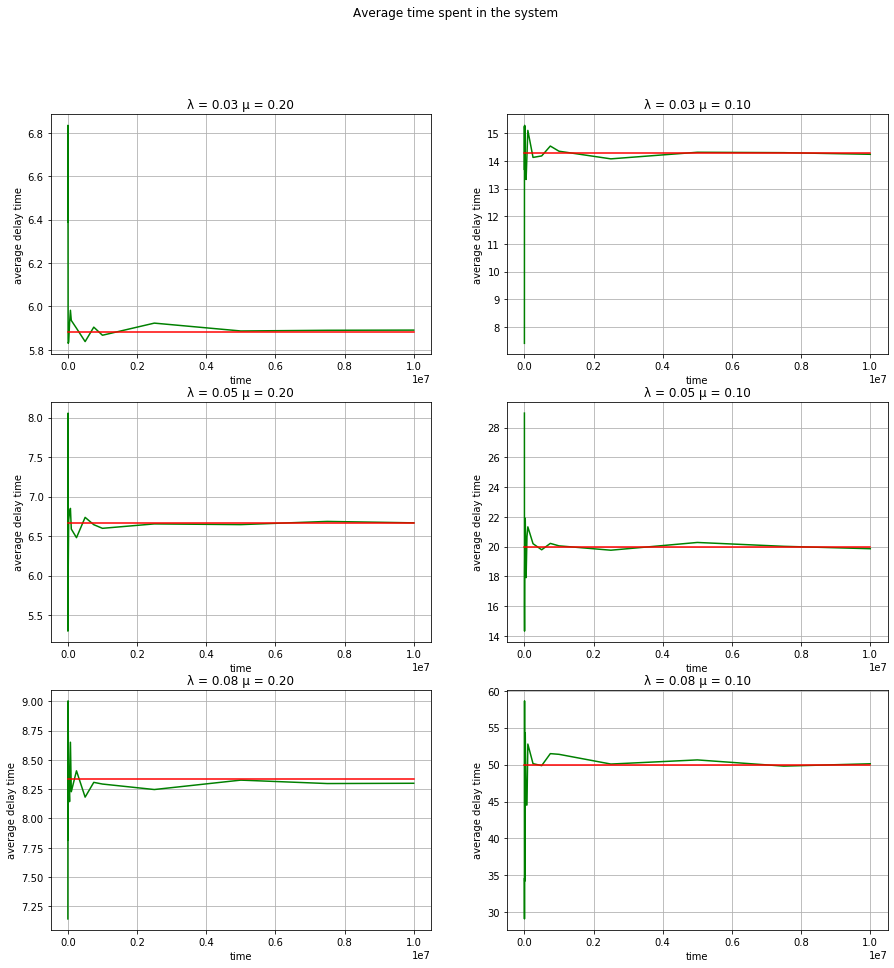

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = delay_time_avg[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

time_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(time_by_systems.keys()))):
        time_by_systems[list(time_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('Average time spent in the system')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, time_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, [(1)/(1/PROCESSING_TIMES[j] - LAMBDAS[i]) for k 
                                               in TOTAL_SIMULATION_TIMES], 'r')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('average delay time')

### System downtime probability 

For a stationary distribution (in theory):<br>
$$p_{down} = \pi_0$$
<br>
<br>
For practice:<br>
$$p_{down} = \frac{\sum\limits_{i = 0}^{n-1}{t_{{start}_{i+1}} - {t_{{end}_{i}}}}}{n},$$
<br> $\qquad$ where $n$ - total amount of requests in system
<br> $\qquad$ $t_{{start}_{i+1}}$ - time, when $i+1$-th request has been sent to the server for processing 
<br> $\qquad$ $t_{{end}_{i}}$ - time, the processing of the $i$-th request finished (it left the system)<br>

#### Stationary distribution<br>
Stationary distribution: $\pi = \pi \mathbb{P}$<br>
<br>
	Condition for the existence of a stationary distribution : $\lambda < \mu$<br><br>
	Finding stationary distribution:<br>
	<br>
	$\pi_0 = \pi_0\frac{\mu}{\lambda + \mu} + \pi_1\frac{\mu}{\lambda + \mu} \quad \quad \rightarrow \quad \quad \pi_1 = \frac{\lambda}{\mu}\pi_0$
    <br><br>
	$\pi_1 = \pi_0\frac{\lambda}{\lambda + \mu} + \pi_2\frac{\mu}{\lambda + \mu} \quad \quad \rightarrow \quad \quad \pi_2 = \frac{\lambda^2}{\mu^2}\pi_0$
	<br><br>
	$\dots$
	<br><br>
	$\pi_{n} = \pi_{n-1}\frac{\lambda}{\lambda + \mu} + \pi_{n+1}\frac{\mu}{\lambda + \mu} \quad \quad \rightarrow \quad \quad \pi_{n} = \frac{\lambda^{n}}{\mu^{n}}\pi_0$
	<br><br>
	As $\sum\limits_{i = 0}^{\infty}\pi_i = \pi_0(1 + \frac{\lambda}{\mu} + \frac{\lambda^2}{\mu^2} + \dots) = \pi_0\frac{1}{1 - \frac{\lambda}{\mu}}$
    <br><br>
	On the other hand, $\sum\limits_{i = 0}^{\infty}\pi_i = 1$.
    <br><br>
	Then, $\pi_0 = \frac{\mu - \lambda}{\mu}$

In [ ]:
probability_system_downtime = []
for i in range(len(jobs)):
    time = 0
    l = list(jobs[i].values())
    for j in range(len(l)-1):
        time += l[j+1].service_start_time - l[j].service_end_time   
    probability_system_downtime.append(time/max(l[-1].service_end_time, simulators[i].system.simulation_time))

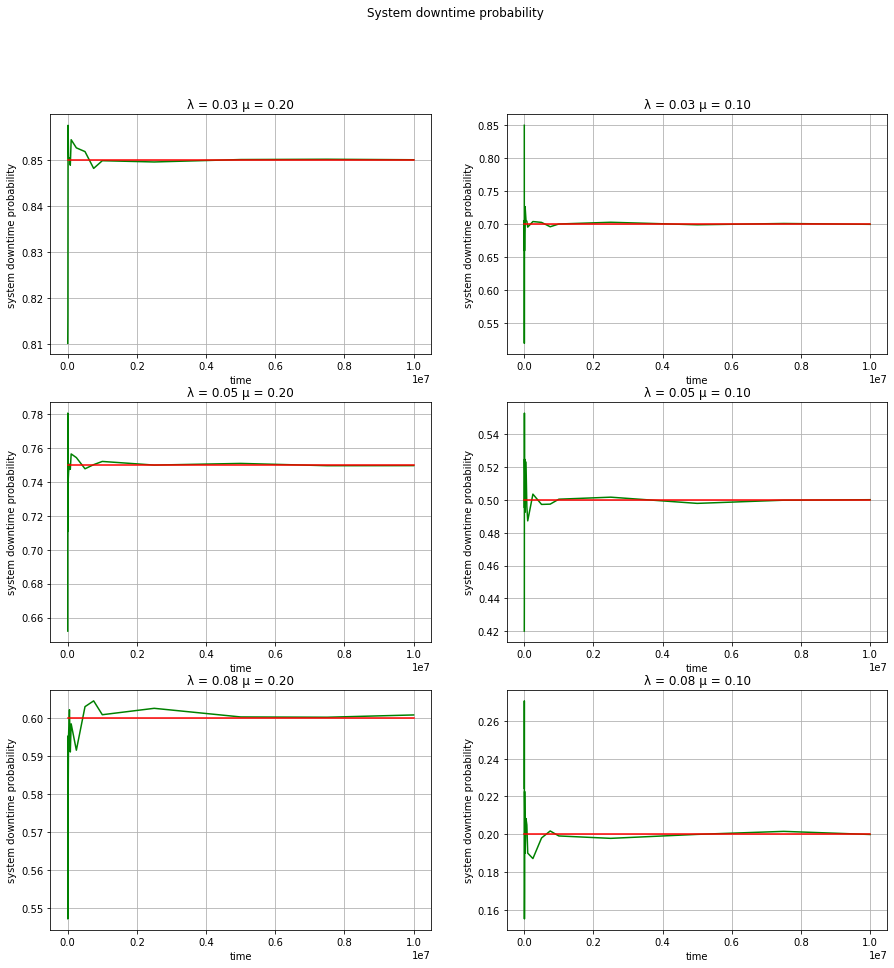

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = probability_system_downtime[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

prob_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(prob_by_systems.keys()))):
        prob_by_systems[list(prob_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('System downtime probability')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, prob_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, [(1/PROCESSING_TIMES[j] - LAMBDAS[i])/(1/PROCESSING_TIMES[j]) for k 
                                               in TOTAL_SIMULATION_TIMES], 'r')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('system downtime probability')

### Probability of waiting = 1 - system downtime probability

For a stationary distribution (in theory):<br>
$$p_{wait} = 1 - p_{down}$$
<br>
<br>
For practice:<br>
$$p_{wait} = 1 - p_{down}$$

In [ ]:
probability_waiting = [(1 - i) for i in probability_system_downtime]

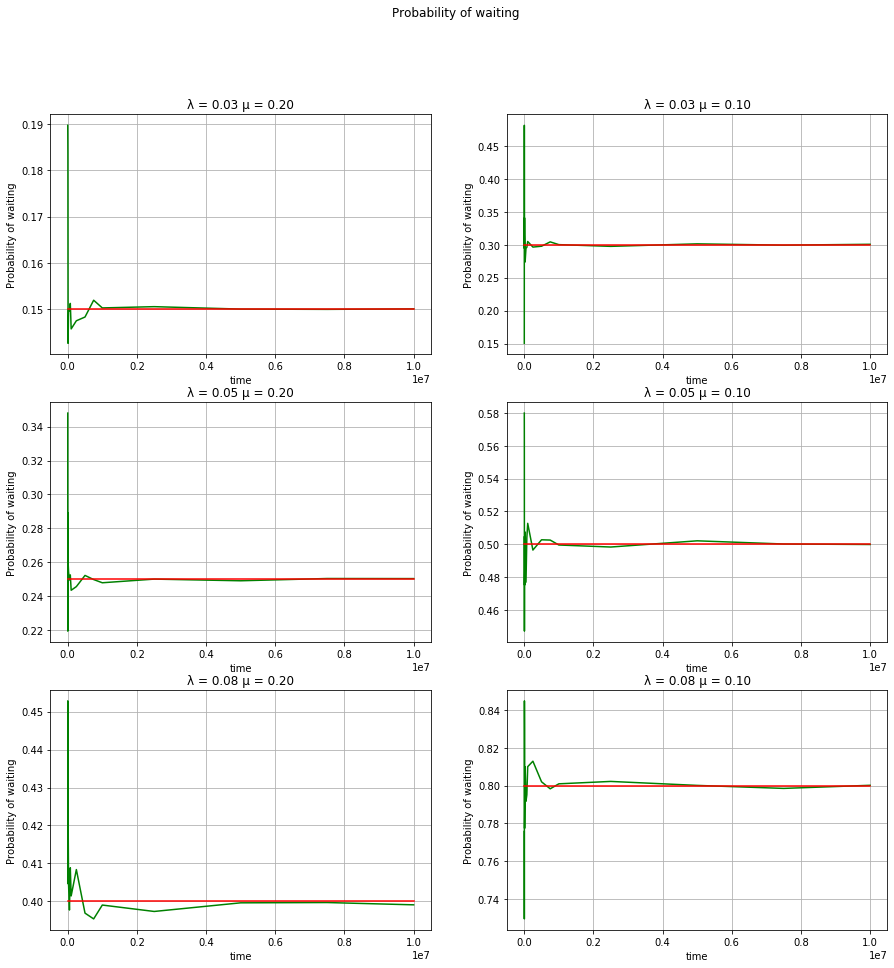

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = probability_waiting[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

prob_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(prob_by_systems.keys()))):
        prob_by_systems[list(prob_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('Probability of waiting')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, prob_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, [(1 - (1/PROCESSING_TIMES[j] - LAMBDAS[i])/(1/PROCESSING_TIMES[j])) for k 
                                               in TOTAL_SIMULATION_TIMES], 'r')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('Probability of waiting')

### Average number of requests in the queue 

Average number of applications in the queue in stationary mode :
<br><br>
   $L = \sum\limits_{k = 0}^{\infty} \pi_k k = \sum\limits_{k = 0}^{\infty}(\frac{\lambda}{\mu})^{k} \frac{\mu - \lambda}{\mu}k =
    \frac{\lambda}{\mu}[\sum\limits_{k = 0}^{\infty}(\frac{\lambda}{\mu})^{k-1}k]\frac{\mu - \lambda}{\mu}$
    <br><br>
    $f(x) = \sum\limits_{k = 0}^{\infty}(x)^{k-1}k = \sum\limits_{k = 0}^{\infty}(x^k)_x^{'} =
    (\sum\limits_{k = 0}^{\infty}x^k)_x^{'}
    = (\frac{x}{1-x})_x^{'} = \frac{(1-x) + x}{(1-x)^2} = \frac{1}{(1-x)^2}$
    <br><br>
    <br><br>
    Then, substituting $x = \frac{\lambda}{\mu}$, we obtain:
	<br><br>
    $ f(\frac{\lambda}{\mu}) = \frac{1}{(1-\frac{\lambda}{\mu})^2} = \frac{\mu^2}{(\mu - \lambda)^2}$
    <br><br>
    Then:
    <br><br>
    $L = \dots = \quad
    \frac{\lambda}{\mu}[\sum\limits_{k = 0}^{\infty}(\frac{\lambda}{\mu})^{k-1}k]\frac{\mu - \lambda}{\mu} \quad = \quad 
    \frac{\lambda}{\mu}f(\frac{\lambda}{\mu})\frac{\mu - \lambda}{\mu} \quad = \frac{\lambda}{\mu}\frac{\mu^2}{(\mu - \lambda)^2}\frac{\mu - \lambda}{\mu} \quad = \quad \frac{\lambda}{\mu - \lambda}$
    <br><br>
    $L = \frac{\lambda}{\mu - \lambda}$ - Average number of requests in the queue

For practive:<br><br>
$$L = \frac{\sum\limits_{t = 0}^{T}jobs_t}{T}$$
<br><br>
$\qquad$ where $jobs_t$ - amount of requests in the queue at the time $t$<br>
$\qquad T$ - number of all points in time (when observations were recorded) 

In [ ]:
avg_jobs_queue = []
for simulator in simulators:
    avg_jobs_queue.append(sum(simulator.system.queue_summary_over_time.values())/
                          len(simulator.system.queue_summary_over_time.values()))

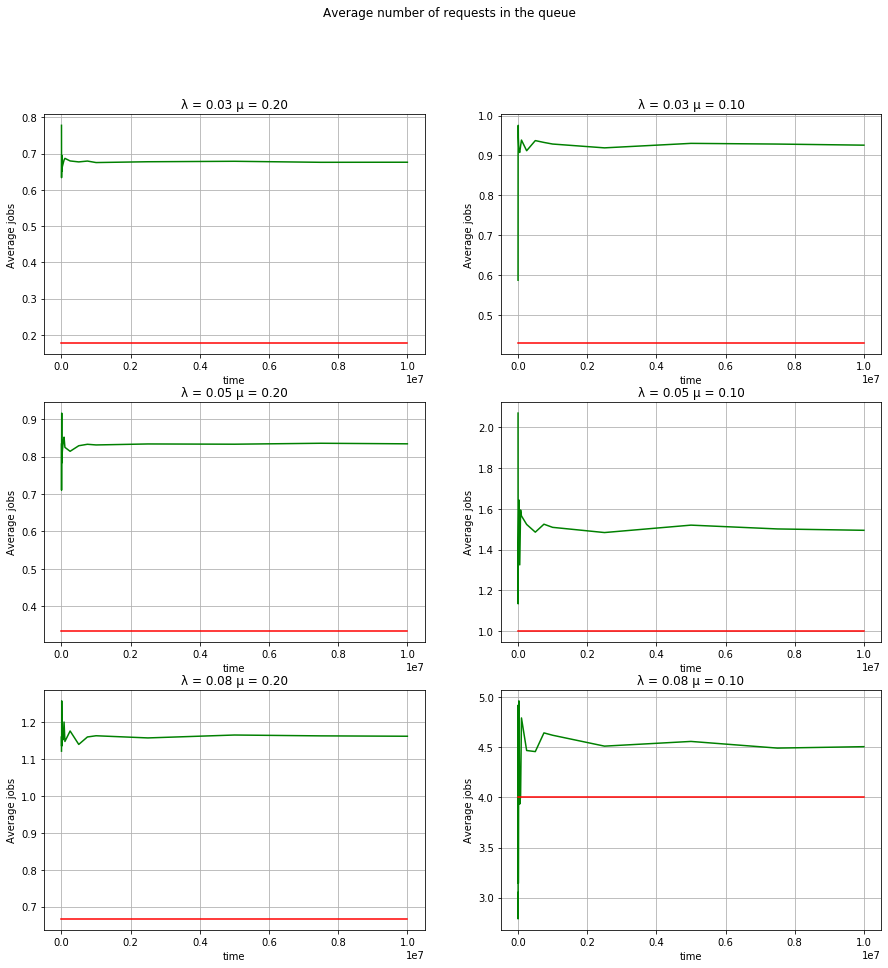

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = avg_jobs_queue[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

avg_jobs_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(avg_jobs_by_systems.keys()))):
        avg_jobs_by_systems[list(avg_jobs_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('Average number of requests in the queue')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, avg_jobs_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, [(LAMBDAS[i])/(1/PROCESSING_TIMES[j] - LAMBDAS[i]) for k 
                                               in TOTAL_SIMULATION_TIMES], 'r')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('Average jobs')

### Probability of failure  = 0

## Queuing system for $\lambda > \mu$ 

In [ ]:
LAMBDAS = [0.08, 0.1]
PROCESSING_TIMES = [15, 20]
TOTAL_SIMULATION_TIMES = [1000, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000, 250000, 500000]

In [ ]:
fileSystem = open('./system.txt', 'w')
fileSave = open('./results.txt', 'w')
simulators = []
jobs = []
for time in TOTAL_SIMULATION_TIMES:
    for this_lambda in LAMBDAS:
        for process_time in PROCESSING_TIMES:
            fileSystem.write('_____________________LAMBDA_{}_MU_{:.2f}________________________\n'.format(this_lambda, 
                                                                                                         1/process_time))
            fileSave.write('_____________________LAMBDA_{}_MU_{:.2f}________________________\n'.format(this_lambda, 
                                                                                                       1/process_time))
            simulator = Simulator(this_lambda, process_time, time)     
            the_jobs = simulator.run(time)  
            jobs.append(the_jobs)
            save_results()
            simulators.append(simulator)
fileSystem.close()
fileSave.close()


Time: 0 sec, Simulation starts for λ=0.08  μ=0.07
Time: 1346.4282922672191sec End of last job in the System
Total jobs:87

Time: 0 sec, Simulation starts for λ=0.08  μ=0.05
Time: 1657.6411041352217sec End of last job in the System
Total jobs:79

Time: 0 sec, Simulation starts for λ=0.1  μ=0.07
Time: 1351.3282475179183sec End of last job in the System
Total jobs:103

Time: 0 sec, Simulation starts for λ=0.1  μ=0.05
Time: 1420.8627712778239sec End of last job in the System
Total jobs:77

Time: 0 sec, Simulation starts for λ=0.08  μ=0.07
Time: 3204.0983557005943sec End of last job in the System
Total jobs:209

Time: 0 sec, Simulation starts for λ=0.08  μ=0.05
Time: 3704.674597166834sec End of last job in the System
Total jobs:198

Time: 0 sec, Simulation starts for λ=0.1  μ=0.07
Time: 3945.126971401829sec End of last job in the System
Total jobs:260

Time: 0 sec, Simulation starts for λ=0.1  μ=0.05
Time: 5007.8619770285795sec End of last job in the System
Total jobs:235

Time: 0 sec, Sim

## Queuing system characteristics for $\lambda > \mu$ 

### Average time spent in the system

For practice:<br>
$$\overline{t}_{sys} = \frac{\sum\limits_{i = 0}^{n}{t_{i}}}{n},$$
<br> $\qquad$ where $n$ - the number of all requests that were in the system 
<br> $\qquad$ $t_i$ - time, that $i$-th request was in the system (time in queue + processing time) <br>

In [ ]:
delay_time_avg = []
for job in jobs:
    time = 0
    for j in list(job.values()):
        time += j.job_delay_time 
    delay_time_avg.append(time/len(job))

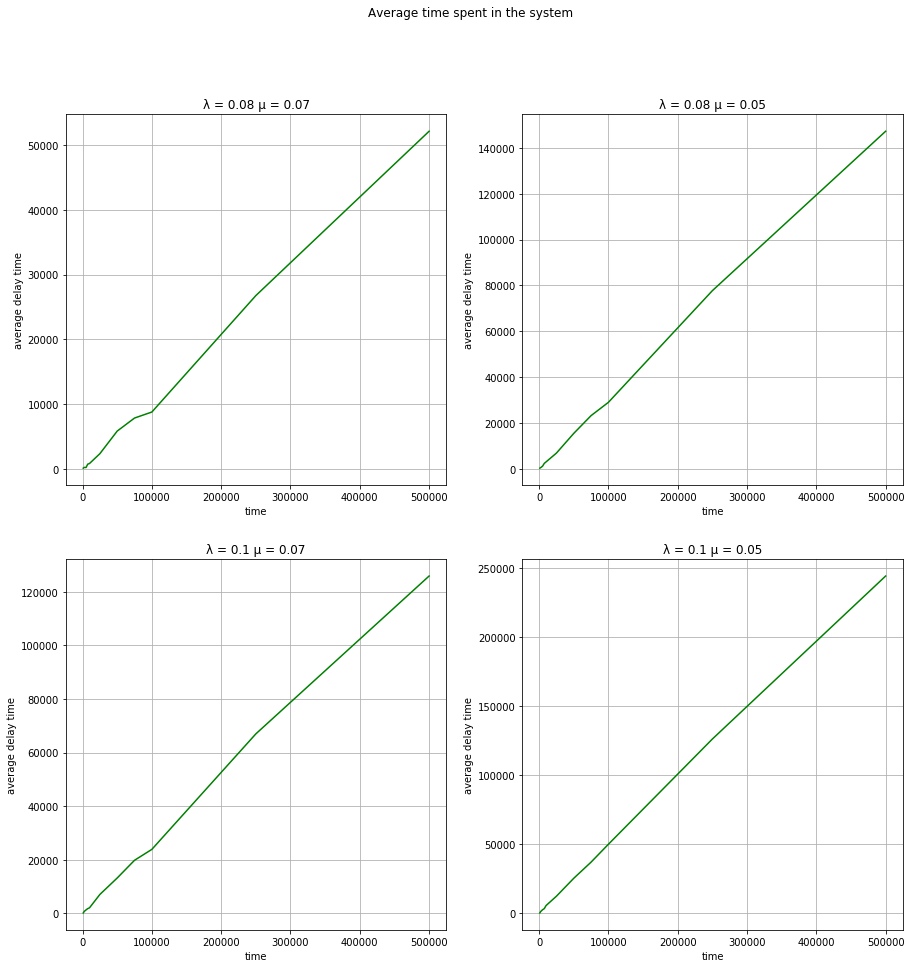

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = delay_time_avg[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

time_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(time_by_systems.keys()))):
        time_by_systems[list(time_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('Average time spent in the system')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, time_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('average delay time')

### System dowtime probability

For practice:<br>
$$p_{down} = \frac{\sum\limits_{i = 0}^{n-1}{t_{{start}_{i+1}} - {t_{{end}_{i}}}}}{n},$$
<br> $\qquad$ where $n$ - number of all requests that were in the system
<br> $\qquad$ $t_{{start}_{i+1}}$ - time, when the $i+1$-th request was sent to the server for processing 
<br> $\qquad$ $t_{{end}_{i}}$ - the time when the processing of the $i$-th request was completed (it left the system) <br>

In [ ]:
probability_system_downtime = []
for i in range(len(jobs)):
    time = 0
    l = list(jobs[i].values())
    for j in range(len(l)-1):
        time += l[j+1].service_start_time - l[j].service_end_time   
    probability_system_downtime.append(time/max(l[-1].service_end_time, simulators[i].system.simulation_time))

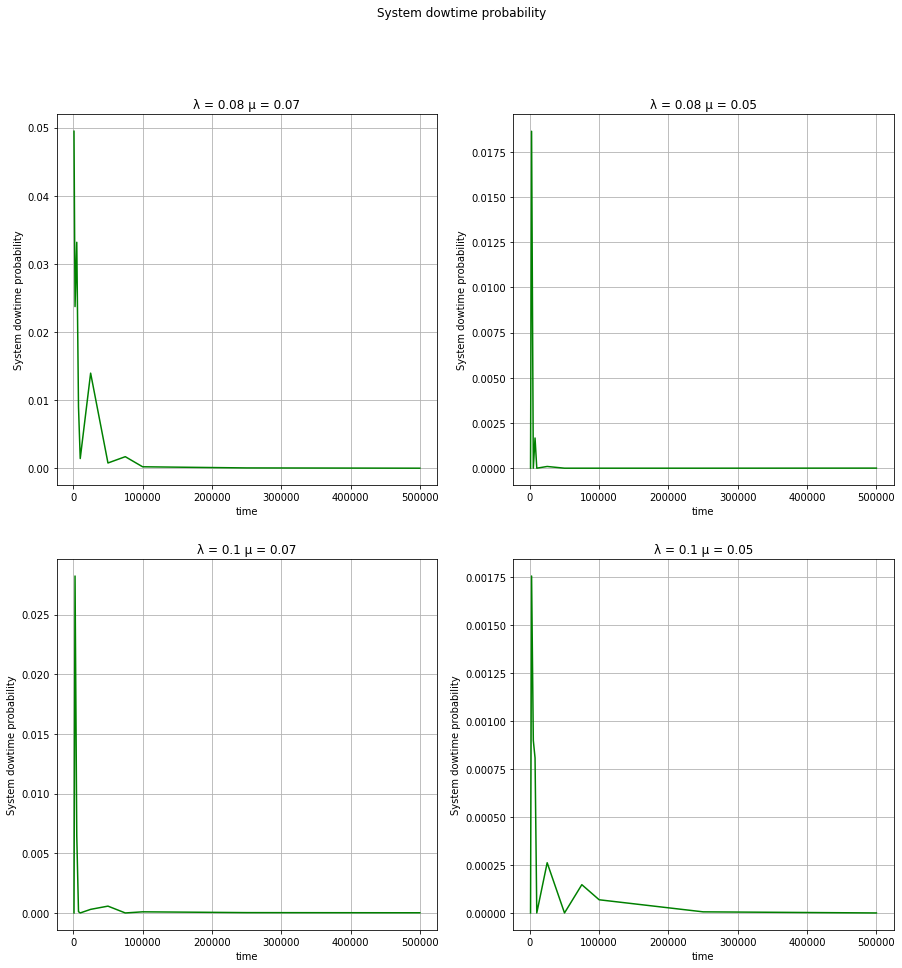

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = probability_system_downtime[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

prob_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(prob_by_systems.keys()))):
        prob_by_systems[list(prob_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('System dowtime probability')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, prob_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('System dowtime probability')

### The probability of waiting  = 1 - system downtime probability

For practice:<br>
$$p_{wait} = 1 - p_{down}$$

In [ ]:
probability_waiting = [(1 - i) for i in probability_system_downtime]

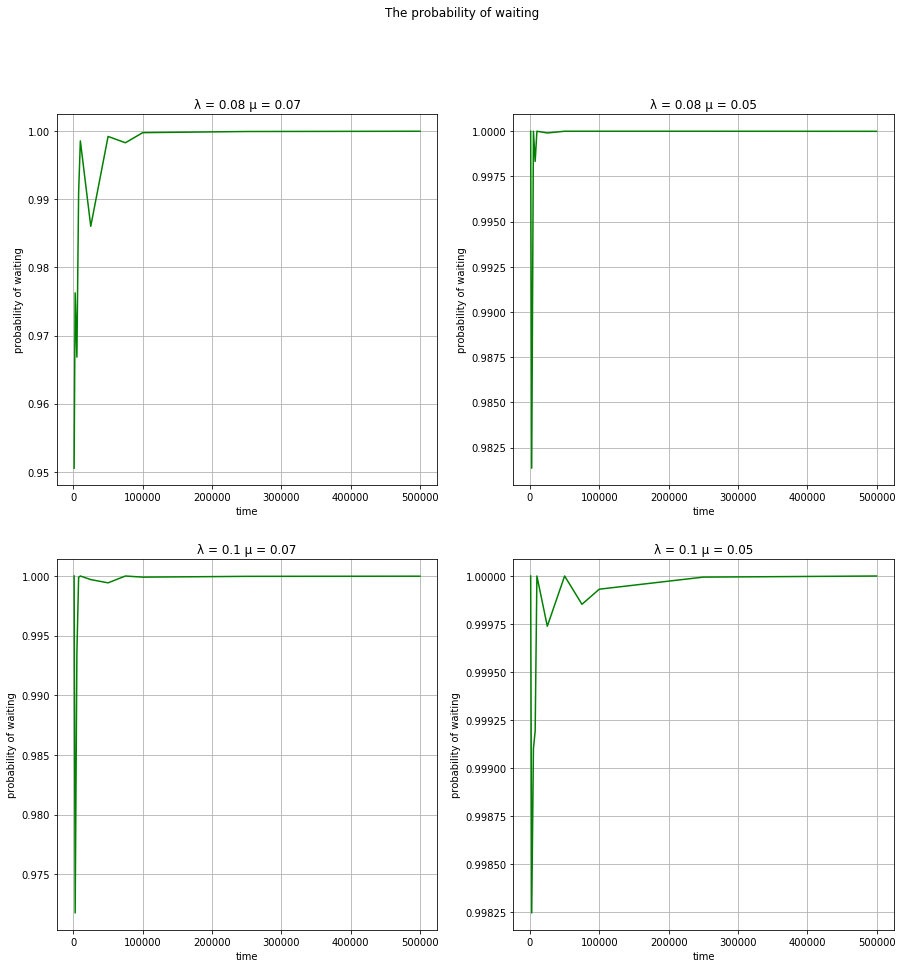

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = probability_waiting[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

prob_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(prob_by_systems.keys()))):
        prob_by_systems[list(prob_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('The probability of waiting')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, prob_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('probability of waiting')

### Average number of requests in the queue

For practice:<br><br>
$$L = \frac{\sum\limits_{t = 0}^{T}jobs_t}{T}$$
<br><br>
$\qquad$ where $jobs_t$ - number of requests in the queue at the time $t$<br>
$\qquad T$ - number of all points in time (when observations were recorded) 

In [ ]:
avg_jobs_queue = []
for simulator in simulators:
    avg_jobs_queue.append(sum(simulator.system.queue_summary_over_time.values())/
                          len(simulator.system.queue_summary_over_time.values()))

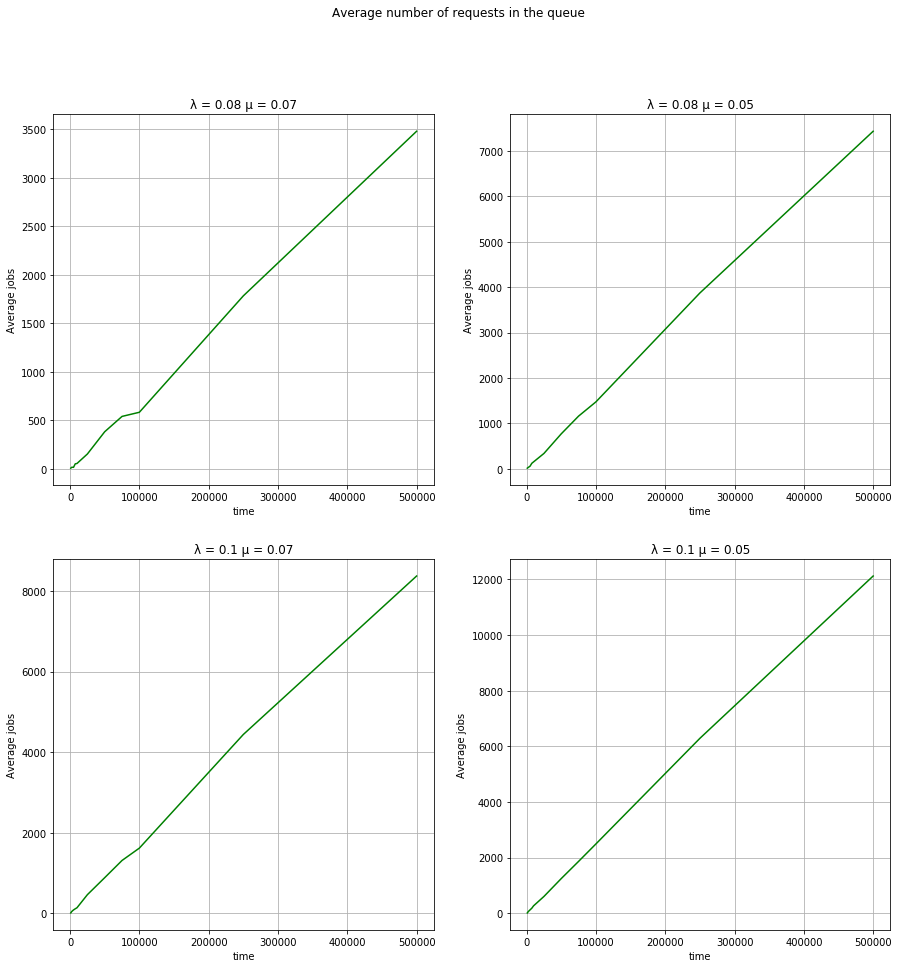

In [ ]:
systems_by_time = {}
for i in range(len(TOTAL_SIMULATION_TIMES)):
    systems_by_time[TOTAL_SIMULATION_TIMES[i]] = avg_jobs_queue[(len(PROCESSING_TIMES)*
                                                                 len(LAMBDAS)*(i)):(len(PROCESSING_TIMES)*
                                                                                    len(LAMBDAS)*(i+1))]

avg_jobs_by_systems = dict([(f'{sim.arrival_rate}_{sim.system.service_rate}', []) for sim in simulators])
for t in range(len(TOTAL_SIMULATION_TIMES)):
    for i in range(len(list(avg_jobs_by_systems.keys()))):
        avg_jobs_by_systems[list(avg_jobs_by_systems.keys())[i]].append(systems_by_time[TOTAL_SIMULATION_TIMES[t]][i])


fig, axs = plt.subplots(len(LAMBDAS), len(PROCESSING_TIMES), figsize=(15, 15))
fig.suptitle('Average number of requests in the queue')
for i in range(len(LAMBDAS)):
    for j in range(len(PROCESSING_TIMES)):
        axs[i,j].grid()
        axs[i,j].plot(TOTAL_SIMULATION_TIMES, avg_jobs_by_systems[f'{LAMBDAS[i]}_{PROCESSING_TIMES[j]}'], 'g')
        axs[i,j].set_title('λ = {} μ = {:.2f}'.format(LAMBDAS[i], 1/PROCESSING_TIMES[j]))
        axs[i,j].set_xlabel('time')
        axs[i,j].set_ylabel('Average jobs')